# Research on internet plans

Megaline, a telecom operator company, wants to know which of the plans they offer will bring in more revenue in order to adjust the advertising budget.

# Step 1

Opening the data file and studying the general information

In [1]:
#import pandas and other important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st
import numpy as np

warnings.filterwarnings("ignore")

In [2]:
#read all input data and assign each dataset to a variable
try:
    calls = pd.read_csv('megaline_calls.csv')
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
try:
    internet = pd.read_csv('megaline_internet.csv')
except:
    internet = pd.read_csv('/datasets/megaline_internet.csv')
try:
    messages = pd.read_csv('megaline_messages.csv')
except:
    messages = pd.read_csv('/datasets/megaline_messages.csv')
try:
    plans = pd.read_csv('megaline_plans.csv')
except:
    plans = pd.read_csv('/datasets/megaline_plans.csv')
try:
    users = pd.read_csv('megaline_users.csv')
except:
    users = pd.read_csv('/datasets/megaline_users.csv')

# Step 2

Preparing the data

In [3]:
#get all the users and plan, two columns only
users_plan = users[["user_id", "plan", "city"]]

In [4]:
# testing to see what it is
# calls.head()
calls['month'] = pd.to_datetime(calls['call_date']).dt.month

#removing calls with 0 duration, because this means that the call was missed. This just adds pointless data, so 
#removing should be no problem
calls = calls[calls['duration'] != 0.00]

#testing
calls.head()

#aggregating calls
calls_agg = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

#rounding duration up
calls_agg['duration'] = (calls_agg['duration'] + 0.5).round()

calls_agg

,user_id,month,duration
0,1000,12,117.0
1,1001,8,172.0
2,1001,9,298.0
3,1001,10,375.0
4,1001,11,405.0
...,...,...,...
2251,1498,12,325.0
2252,1499,9,331.0
2253,1499,10,364.0
2254,1499,11,289.0


In [5]:
# testing to see what internet has
# internet.head()

# setting to datetime format
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

#converting mb to gb for easy conversion
internet['gb_used'] = internet['mb_used']/1024
internet['month'] = internet['session_date'].dt.month

#testing everything
internet.head(15)

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,0.087754,12
1,1000_204,1000,2018-12-31,0.00,0.000000,12
2,1000_379,1000,2018-12-28,660.40,0.644922,12
3,1000_413,1000,2018-12-26,270.99,0.264639,12
4,1000_442,1000,2018-12-27,880.22,0.859590,12
5,1001_0,1001,2018-08-24,284.68,0.278008,8
6,1001_3,1001,2018-12-09,656.04,0.640664,12
7,1001_4,1001,2018-11-04,16.97,0.016572,11
8,1001_10,1001,2018-11-27,135.18,0.132012,11
9,1001_15,1001,2018-12-13,761.92,0.744062,12


In [6]:
internet_agg = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()

internet_agg

,user_id,month,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605
...,...,...,...
2272,1498,12,22.595400
2273,1499,9,12.680430
2274,1499,10,19.035576
2275,1499,11,16.419756


In [7]:
# merge the monthly data to the overall table monthly_call_minutes_data
monthly_call_minutes_data = pd.merge(calls_agg, internet_agg, on=['user_id', 'month'], how='left')

#rounding gb up
monthly_call_minutes_data['gb_used'] = (monthly_call_minutes_data['gb_used'] + 0.5).round()
monthly_call_minutes_data.head(15)

,user_id,month,duration,gb_used
0,1000,12,117.0,2.0
1,1001,8,172.0,7.0
2,1001,9,298.0,14.0
3,1001,10,375.0,22.0
4,1001,11,405.0,19.0
5,1001,12,393.0,19.0
6,1002,10,55.0,7.0
7,1002,11,360.0,19.0
8,1002,12,364.0,15.0
9,1003,12,1041.0,27.0


In [8]:
# merge the monthly data to the overall table monthly_call_minutes_data
number_of_calls = calls.groupby(['user_id', 'month'])['duration'].count().reset_index()
number_of_calls.columns = ['user_id', 'month', 'number of calls']
number_of_calls

,user_id,month,number of calls
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
...,...,...,...
2251,1498,12,32
2252,1499,9,35
2253,1499,10,41
2254,1499,11,39


In [9]:
# merge the monthly number of calls to the overall table monthly_call_minutes_data_numbercalls
monthly_call_minutes_data_numbercalls = pd.merge(monthly_call_minutes_data, number_of_calls, on=['user_id', 'month'], how='left')
monthly_call_minutes_data_numbercalls

,user_id,month,duration,gb_used,number of calls
0,1000,12,117.0,2.0,16
1,1001,8,172.0,7.0,22
2,1001,9,298.0,14.0,38
3,1001,10,375.0,22.0,47
4,1001,11,405.0,19.0,49
...,...,...,...,...,...
2251,1498,12,325.0,23.0,32
2252,1499,9,331.0,13.0,35
2253,1499,10,364.0,20.0,41
2254,1499,11,289.0,17.0,39


In [10]:
# setting to datetime format
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month
#print(messages.head(45))

messages_agg = messages.groupby(['user_id', 'month'])['message_date'].count().reset_index()
#messages_agg = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
#messages_agg
messages_agg.columns = ['user_id', 'month', 'number of messages']
messages_agg

,user_id,month,number of messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [11]:
#merging everything together
# merge the monthly number of messaages to the overall table monthly_call_minutes_data_numbercalls
monthly_overall = pd.merge(monthly_call_minutes_data_numbercalls, messages_agg, on=['user_id', 'month'], how='left')
#merged = pd.merge(users, calls_agg, on='user_id', how='right')

#filling na
monthly_overall['number of messages'] = monthly_overall['number of messages'].fillna(value='0')

# convert the grand_total field from data type of object to float:
monthly_overall['number of messages'] = monthly_overall['number of messages'].astype(float, errors = 'raise')

monthly_overall

,user_id,month,duration,gb_used,number of calls,number of messages
0,1000,12,117.0,2.0,16,11.0
1,1001,8,172.0,7.0,22,30.0
2,1001,9,298.0,14.0,38,44.0
3,1001,10,375.0,22.0,47,53.0
4,1001,11,405.0,19.0,49,36.0
...,...,...,...,...,...,...
2251,1498,12,325.0,23.0,32,0.0
2252,1499,9,331.0,13.0,35,0.0
2253,1499,10,364.0,20.0,41,0.0
2254,1499,11,289.0,17.0,39,0.0


In [12]:
# Add user plan and city to the final table
monthly_overall_final = pd.merge(monthly_overall, users_plan, on='user_id', how='left')
monthly_overall_final

,user_id,month,duration,gb_used,number of calls,number of messages,plan,city
0,1000,12,117.0,2.0,16,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,172.0,7.0,22,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,298.0,14.0,38,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,375.0,22.0,47,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,405.0,19.0,49,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...
2251,1498,12,325.0,23.0,32,0.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2252,1499,9,331.0,13.0,35,0.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2253,1499,10,364.0,20.0,41,0.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2254,1499,11,289.0,17.0,39,0.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"


In [13]:
#doing the final merge with plans so all money prices are together in the table
monthly_overall_final = pd.merge(monthly_overall_final, plans, left_on='plan', right_on='plan_name')
monthly_overall_final

,user_id,month,duration,gb_used,number of calls,number of messages,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,117.0,2.0,16,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11,10.0,3.0,2,15.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12,55.0,32.0,7,139.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,10,451.0,17.0,54,21.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,11,423.0,24.0,50,37.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,1498,12,325.0,23.0,32,0.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf
2252,1499,9,331.0,13.0,35,0.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf
2253,1499,10,364.0,20.0,41,0.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf
2254,1499,11,289.0,17.0,39,0.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf


In [14]:
# calculating money for duration, gb used, number of messages, and getting the grand total

# finding cost of duration revenue
monthly_overall_final['duration_revenue'] = monthly_overall_final['duration'] - monthly_overall_final['minutes_included']
monthly_overall_final.loc[monthly_overall_final['duration_revenue'] < 0, 'duration_revenue'] = 0
monthly_overall_final['duration_revenue'] = monthly_overall_final['duration_revenue'] * monthly_overall_final['usd_per_minute']


# finding cost of messages revenue
monthly_overall_final['messages_revenue'] = monthly_overall_final['number of messages'] - monthly_overall_final['messages_included']
monthly_overall_final.loc[monthly_overall_final['messages_revenue'] < 0, 'messages_revenue'] = 0
monthly_overall_final['messages_revenue'] = monthly_overall_final['messages_revenue'] * monthly_overall_final['usd_per_message']



# finding cost of data (converting mb to gb, and also filling na to avoid errors)
monthly_overall_final['gb_used'] = monthly_overall_final['gb_used'] + 0.5
monthly_overall_final['gb_used'] = monthly_overall_final['gb_used'].fillna(value='0')
monthly_overall_final['gb_used'] = monthly_overall_final['gb_used'].astype(int)
monthly_overall_final['data_revenue'] = monthly_overall_final['gb_used'] - (monthly_overall_final['mb_per_month_included'] / 1024)
monthly_overall_final.loc[monthly_overall_final['data_revenue'] < 0, 'data_revenue'] = 0
monthly_overall_final['data_revenue'] = monthly_overall_final['data_revenue'] * monthly_overall_final['usd_per_gb']

monthly_overall_final['grand_total'] = monthly_overall_final['data_revenue'] + monthly_overall_final['messages_revenue'] + monthly_overall_final['duration_revenue'] + monthly_overall_final['usd_monthly_pay']

monthly_overall_final

,user_id,month,duration,gb_used,number of calls,number of messages,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,duration_revenue,messages_revenue,data_revenue,grand_total
0,1000,12,117.0,2,16,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0
1,1006,11,10.0,3,2,15.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0
2,1006,12,55.0,32,7,139.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,14.0,84.0
3,1008,10,451.0,17,54,21.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0
4,1008,11,423.0,24,50,37.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,1498,12,325.0,23,32,0.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,80.0,100.0
2252,1499,9,331.0,13,35,0.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,0.0,20.0
2253,1499,10,364.0,20,41,0.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,50.0,70.0
2254,1499,11,289.0,17,39,0.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,20.0,40.0


# Conclusion

There is a lot of data to work with, and I had to calculate the total amount of messages, calls, the duration of those calls and gb per user. After finding the total amount for each user, I had to calculate the grand total based on whatever plan that each user may have. The final table,  Monthly_overall_final will be used for the next steps

# Step 3
Graph everything 

call duration mean monthly: 412.364804964539

call duration dispersion monthly: 47962.50033932366

call duration standard deviation monthly: 219.00342540545722


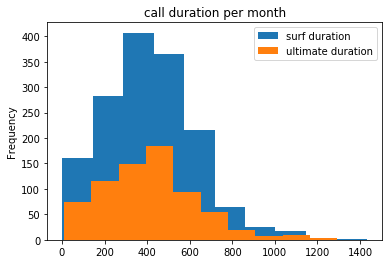

In [15]:
#graphing calls_agg, while also calculating mean, variance, and standard deviation

#getting ultimate users and getting surf users
ultimate_users = monthly_overall_final.query('plan == "ultimate"')
surf_users = monthly_overall_final.query('plan == "surf"')

#graphing both ultimate and surf
ax = surf_users['duration'].plot(kind='hist', legend=True, title='call duration per month')
ultimate_users['duration'].plot(kind='hist', ax=ax, legend=True)

ax.legend(["surf duration", "ultimate duration"]);

calls_mean = calls_agg['duration'].mean()
calls_variance = np.var(calls_agg['duration'])
calls_std = np.std(calls_agg['duration'])
print('call duration mean monthly:', calls_mean)
print('\ncall duration dispersion monthly:', calls_variance)
print('\ncall duration standard deviation monthly:', calls_std)


In [16]:
#the majority of users spend around 400 min monthly, which reflects on the mean calculated above.
#some users spend a lot more, nearing the 1000 min mark, but not many.

number of messages mean monthly: 42.110188261351055

number of messages dispersion monthly: 1096.5210811384227

number of messages standard deviation monthly: 33.11375969500327


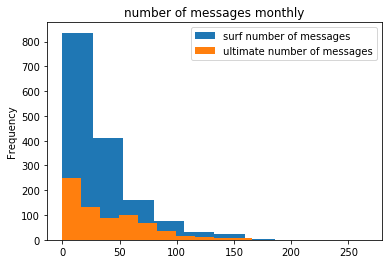

In [17]:
#graphing messages_agg, while also calculating mean, variance, and standard deviation

#graphing both ultimate and surf
ax = surf_users['number of messages'].plot(kind='hist', legend=True, title='number of messages monthly')
ultimate_users['number of messages'].plot(kind='hist', ax=ax, legend=True)

ax.legend(["surf number of messages", "ultimate number of messages"]);

messages_mean = messages_agg['number of messages'].mean()
messages_variance = np.var(messages_agg['number of messages'])
messages_std = np.std(messages_agg['number of messages'])
print('number of messages mean monthly:', messages_mean)
print('\nnumber of messages dispersion monthly:', messages_variance)
print('\nnumber of messages standard deviation monthly:', messages_std)

In [18]:
#The graph here isn't that well represented, and is hard to see what majority sends a month.
#according to the mean calculated, each user messages around 42 messages a month

gb used mean monthly: 16.48652099716595

gb used dispersion monthly: 59.03846162679782

gb used standard deviation monthly: 7.683648978629738


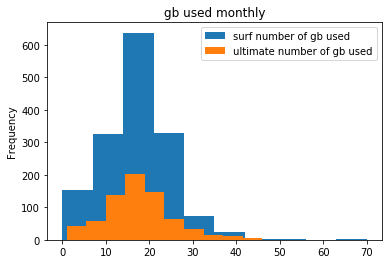

In [19]:
#graphing internet_agg, while also calculating mean, variance, and standard deviation

#graphing both ultimate and surf
ax = surf_users['gb_used'].plot(kind='hist', legend=True, title='gb used monthly')
ultimate_users['gb_used'].plot(kind='hist', ax=ax, legend=True)

ax.legend(["surf number of gb used", "ultimate number of gb used"]);

internet_mean = internet_agg['gb_used'].mean()
internet_variance = np.var(internet_agg['gb_used'])
internet_std = np.std(internet_agg['gb_used'])
print('gb used mean monthly:', internet_mean)
print('\ngb used dispersion monthly:', internet_variance)
print('\ngb used standard deviation monthly:', internet_std)

In [20]:
#the majority of users spend around 16 gb monthly, which reflects on the mean calculated above

In [21]:
# Step 4, testing the hypotheses
# fill all the null value to 0
monthly_overall_final['grand_total'] = monthly_overall_final['grand_total'].fillna(value='0')

# convert the grand_total field from data type of object to float:
monthly_overall_final['grand_total'] = monthly_overall_final['grand_total'].astype(float, errors = 'raise')

# get the ultimate and surf users into two different
ultimate_users = monthly_overall_final.query('plan == "ultimate"')
surf_users = monthly_overall_final.query('plan == "surf"')

alpha = 0.05

results = st.ttest_ind(ultimate_users['grand_total'], surf_users['grand_total'], equal_var = False)

print('p-value:', results.pvalue)

if(results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")
    
print("\nThe average revenue for ultimate users: $", ultimate_users['grand_total'].mean())
print("The average revenue for surf users: $", surf_users['grand_total'].mean())

# CONCLUSION FROM THIS TEST
# The means are statistically different with a significance alpha value of 0.5, therefore We REJECT the NULL HYPOTHESIS

p-value: 3.5606309563615155e-18
We reject the null hypothesis

The average revenue for ultimate users: $ 72.28089887640449
The average revenue for surf users: $ 59.77003238341968


In [22]:
# get the users of NY-NJ
ny_monthly = monthly_overall_final[monthly_overall_final['city'].str.contains('NY-NJ')]
not_ny_monthly = monthly_overall_final[monthly_overall_final['city'].str.contains("NY-NJ") == False]


alpha = 0.05

results = st.ttest_ind(ny_monthly['grand_total'], not_ny_monthly['grand_total'], equal_var = False)

print('p-value:', results.pvalue)

if(results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")
    
    
    
# CONCLUSION FROM THIS TEST
# The means are statistically different with a significance alpha value of 0.5, therefore We REJECT the NULL HYPOTHESIS

p-value: 0.011490399093320948
We reject the null hypothesis


# Conclusion

In terms of what plans should be focused on, ultimate generates more revenue. However, just by judging by graphs and means, people in surf tend to spend more extra money than their base price ($20). 

For the first hypotheses that was tested, the P-Value was incredibly small, going into e-18, which shows that the average revenue of both surf and ultimate are very similar, thus rejecting the null hypothses. 
For the second hypotheses that was tested, while the null hypotheses is rejected, the p-value isn't as significant as the previous test, which had e-18. 